# Population, Electricity Access and Consumption
###                                 Ethiopia, Egypt snd Sudan

by Belachew G Ayele,
May 2020

In [49]:
# Importing libraries
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

### 1. Population data 
Source: Worldbank

In [50]:
# Reading population data
df = pd.read_excel('C:/Users/Belachew/Desktop/Population/Worldpopulation/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',
                       sheet_name='ESTIMATES',
                       skiprows=range(16),
                       skipfooter=2)
                     # sheet_name o sheetname


In [51]:
# Display the first five records
df.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2.53643e+06,2.58403e+06,2.63086e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814819,824004,833720,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1.72161e+06,1.76003e+06,1.79714e+06,...,5.80164e+06,5.88171e+06,5.96213e+06,6.04268e+06,6.12317e+06,6.20354e+06,6.28371e+06,6.36353e+06,6.44284e+06,6.52149e+06
4,5,Estimates,Least developed countries,d,941,Development Group,902,195428,199180,203015,...,856471,876867,897793,919223,941131,963520,986385,1.00969e+06,1.03339e+06,1.05744e+06


In [52]:
# Drop fields not needed
df.drop(['Index','Variant','Notes','Country code','Type','Parent code'],axis=1,inplace=True)

In [53]:
# Prepare list of years and countries
years = list(map(str, range(1950, 2021)))
states = list(['Ethiopia', 'Egypt', 'Sudan'])

In [54]:
# check the list of states
states

['Ethiopia', 'Egypt', 'Sudan']

In [55]:
# Rename long column names
df.rename(columns={'Region, subregion, country or area *':'Country'}, inplace=True)
df.columns

Index(['Country', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [56]:
# Set index
df.set_index('Country', inplace=True)

In [57]:
df.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
WORLD,2.53643e+06,2.58403e+06,2.63086e+06,2.67761e+06,2.72485e+06,2.77302e+06,2.82244e+06,2.87331e+06,2.92569e+06,2.97958e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
UN development groups,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
More developed regions,814819,824004,833720,843788,854060,864430,874824,885207,895576,905949,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06
Less developed regions,1.72161e+06,1.76003e+06,1.79714e+06,1.83382e+06,1.87079e+06,1.90859e+06,1.94762e+06,1.9881e+06,2.03011e+06,2.07363e+06,...,5.80164e+06,5.88171e+06,5.96213e+06,6.04268e+06,6.12317e+06,6.20354e+06,6.28371e+06,6.36353e+06,6.44284e+06,6.52149e+06
Least developed countries,195428,199180,203015,206986,211133,215486,220061,224862,229882,235106,...,856471,876867,897793,919223,941131,963520,986385,1.00969e+06,1.03339e+06,1.05744e+06


In [58]:
# Extract data by states and years and Transpose
df_ees =df.loc[states, years].T

In [59]:
#df_can.index.name = None

In [60]:
df_ees

Country,Ethiopia,Egypt,Sudan
1950,18128,20452,5733.79
1951,18467,20948.6,5884.65
1952,18819.7,21473.8,6041.33
1953,19184.3,22028.1,6204.1
1954,19560,22611.5,6373.31
...,...,...,...
2016,103603,94447.1,39847.4
2017,106400,96442.6,40813.4
2018,109224,98423.6,41801.5
2019,112079,100388,42813.2


In [61]:
# Import plotting libraries
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [62]:
# Set plot style
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


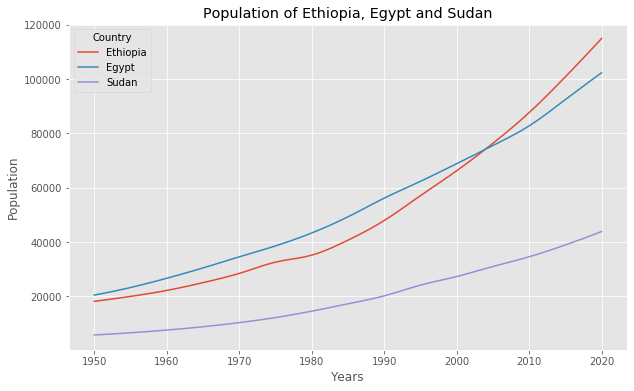

In [63]:
#Plot popualtion data
df_ees.plot(kind ='line', figsize= (10,6))

plt.title('Population of Ethiopia, Egypt and Sudan')
plt.ylabel('Population')
plt.xlabel('Years')

plt.show()

### 2. Percent Population Access to Electricity
source: Worldbank

In [64]:
# Import data
df1 = pd.read_excel('C:/Users/Belachew/Desktop/Population/Worldpopulation/API_EG.ELC.ACCS.ZS_DS2_en_excel_v2_991137.xls',
                       sheet_name='Data',
                       skiprows=range(3),
                       skipfooter=2)
                     # sheet_name or  sheetname

In [65]:
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.356292,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.700000,43.222019,69.100000,70.153481,89.500000,71.500000,97.700000,97.700000,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,33.368420,34.600000,35.670788,36.878685,32.000000,42.000000,40.624527,41.886230,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,World,WLD,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.251434,82.141931,84.829015,85.131904,85.606673,86.797401,87.995487,88.867073,NaN,NaN
258,Samoa,WSM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.626244,96.668575,97.156471,97.591156,97.900000,99.501366,99.783936,96.800000,NaN,NaN
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.640274,67.633110,69.433235,75.600000,66.100000,74.268372,76.066811,79.200000,NaN,NaN


In [66]:
# Drop fields not needed
df1.drop(['Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)

In [67]:
df1

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.356292,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.700000,43.222019,69.100000,70.153481,89.500000,71.500000,97.700000,97.700000,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.368420,34.600000,35.670788,36.878685,32.000000,42.000000,40.624527,41.886230,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.251434,82.141931,84.829015,85.131904,85.606673,86.797401,87.995487,88.867073,NaN,NaN
258,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.626244,96.668575,97.156471,97.591156,97.900000,99.501366,99.783936,96.800000,NaN,NaN
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.640274,67.633110,69.433235,75.600000,66.100000,74.268372,76.066811,79.200000,NaN,NaN


In [68]:
# Set Index
df1.set_index('Country Name', inplace=True)# Save years and states to list


In [69]:
# Save years and states to list years2 = list(map(str, range(2000, 2018)))
years2 = list(map(str, range(2000, 2018)))
states2 = list(['Ethiopia', 'Egypt', 'Sudan']) # Egypt originly was named as Egypt, Arab Rep. in the data



In [70]:
years2

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [71]:
# Extract and transpose yeras and states
df2 = df1.loc[states2, years2].T

In [72]:
df2

Country Name,Ethiopia,Egypt,Sudan
2000,12.700000,97.700000,23.000000
2001,25.594385,97.439880,31.857803
2002,26.484259,97.727356,32.340141
2003,27.354923,98.800000,32.803276
2004,28.201456,98.239769,33.242275
2005,14.000000,99.400000,33.655293
2006,29.827066,99.040000,34.052818
2007,30.636023,98.861328,34.448421
2008,31.444979,99.800000,34.855667
2009,32.284969,99.311317,29.000000


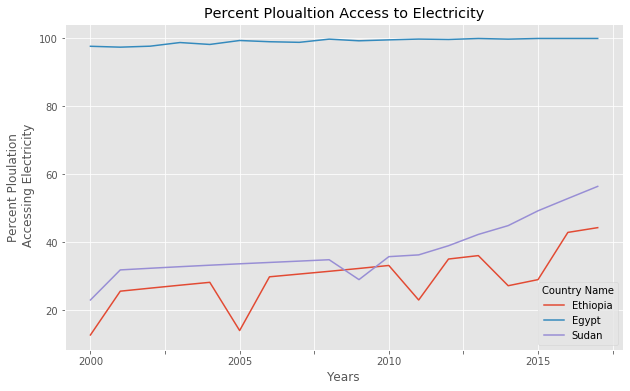

In [73]:
# Plot the data
df2.plot(kind ='line', figsize= (10,6))

plt.title('Percent Ploualtion Access to Electricity')
plt.ylabel('Percent Ploulation\n Accessing Electricity')
plt.xlabel('Years')

plt.show()

In [74]:
# Rest index
df2.reset_index() # this reset th index


Country Name,index,Ethiopia,Egypt,Sudan
0,2000,12.700000,97.700000,23.000000
1,2001,25.594385,97.439880,31.857803
2,2002,26.484259,97.727356,32.340141
3,2003,27.354923,98.800000,32.803276
4,2004,28.201456,98.239769,33.242275
5,2005,14.000000,99.400000,33.655293
6,2006,29.827066,99.040000,34.052818
7,2007,30.636023,98.861328,34.448421
8,2008,31.444979,99.800000,34.855667
9,2009,32.284969,99.311317,29.000000


In [75]:
# Copy the data 
df3 = df2.copy()

In [76]:
df3

Country Name,Ethiopia,Egypt,Sudan
2000,12.700000,97.700000,23.000000
2001,25.594385,97.439880,31.857803
2002,26.484259,97.727356,32.340141
2003,27.354923,98.800000,32.803276
2004,28.201456,98.239769,33.242275
2005,14.000000,99.400000,33.655293
2006,29.827066,99.040000,34.052818
2007,30.636023,98.861328,34.448421
2008,31.444979,99.800000,34.855667
2009,32.284969,99.311317,29.000000


In [77]:
# Calculate rolling avrage of three year
df3[states2] = df3.rolling(window=3).mean()

In [78]:
df3

Country Name,Ethiopia,Egypt,Sudan
2000,NaN,NaN,NaN
2001,NaN,NaN,NaN
2002,21.592881,97.622412,29.065982
2003,26.477856,97.989079,32.333740
2004,27.346879,98.255708,32.795231
2005,23.185460,98.813256,33.233615
2006,24.009507,98.893256,33.650129
2007,24.821030,99.100443,34.052177
2008,30.636023,99.233776,34.452302
2009,31.455324,99.324215,32.768030


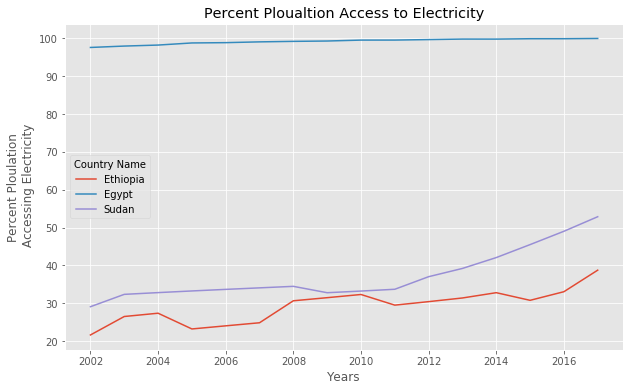

In [79]:
# Plot plot 
df3.plot(kind ='line', figsize= (10,6))

plt.title('Percent Ploualtion Access to Electricity')
plt.ylabel('Percent Ploulation\n Accessing Electricity')
plt.xlabel('Years')

plt.show()

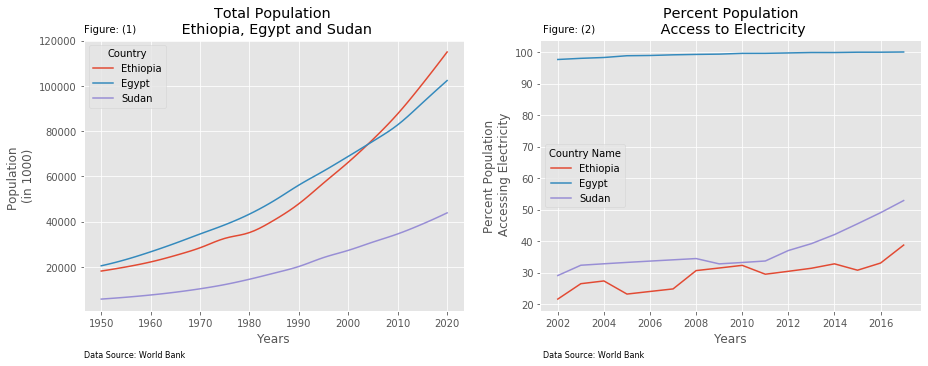

In [80]:
# combined figure


fig1 = plt.figure() # create figure

ax0 = fig1.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig1.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_ees.plot(kind='line', figsize=(15, 5), ax=ax0) # add to subplot 1
ax0.set_title('Total Population \n Ethiopia, Egypt and Sudan')
ax0.set_ylabel('Population \n(in 1000)')
ax0.set_xlabel('Years')
ax0.text(0.125, .90, "Figure: (1)", transform=fig1.transFigure)
ax0.text(0.125, -.001, "Data Source: World Bank", transform=fig1.transFigure, fontsize = 8)

# Subplot 2: Line plot
df3.plot(kind='line', figsize=(15, 5), ax=ax1) # add to subplot 2
ax1.set_title ('Percent Population\n Access to Electricity')
ax1.set_ylabel('Percent Population\n Accessing Electricity')
ax1.set_xlabel('Years')
ax1.text(.55, .90, "Figure: (2)", transform=fig1.transFigure)
ax0.text(0.55, -.001, "Data Source: World Bank", transform=fig1.transFigure, fontsize = 8)
fig1.savefig('Population.tif',bbox_inches='tight')
plt.show()



### 3. Per Capia Electicity
Sources. CIA Fact book

In [81]:
# Read data
df4 = pd.read_excel('C:/Users/Belachew/Desktop/Population/Worldpopulation/Eth_Egy_Sud_electric.xlsx',
                       sheet_name='Sheet1',
                       skiprows=range(0),
                       skipfooter=0)
                     # sheet_name or  sheetname


In [82]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   key                                            3 non-null      int64  
 1   Country                                        3 non-null      object 
 2   Electricity Consumption(kW·h/yr) (in Million)  3 non-null      int64  
 3   Population (in Million)                        3 non-null      float64
 4   Avg. Electrical energy per capita              3 non-null      int64  
 5   Avg. power per capita                          3 non-null      int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 272.0+ bytes


In [83]:
df4


,key,Country,Electricity Consumption(kW·h/yr) (in Million),Population (in Million),Avg. Electrical energy per capita,Avg. power per capita
0,23,Egypt,143000,94.666993,1510,172
1,93,Sudan,9900,36.729501,269,30
2,111,Ethiopia,6700,102.374044,65,7


In [84]:
df4.drop(['key'],axis=1,inplace=True)

In [85]:
df4.set_index('Country', inplace=True)

In [86]:
df4

,Electricity Consumption(kW·h/yr) (in Million),Population (in Million),Avg. Electrical energy per capita,Avg. power per capita
Country,,,,
Egypt,143000,94.666993,1510,172
Sudan,9900,36.729501,269,30
Ethiopia,6700,102.374044,65,7


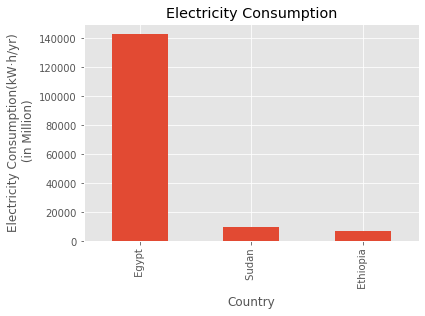

In [87]:
df4['Electricity Consumption(kW·h/yr) (in Million)'].plot(kind='bar')

plt.title('Electricity Consumption')
plt.ylabel('Electricity Consumption(kW·h/yr)\n (in Million)')
plt.xlabel('Country')

plt.show()

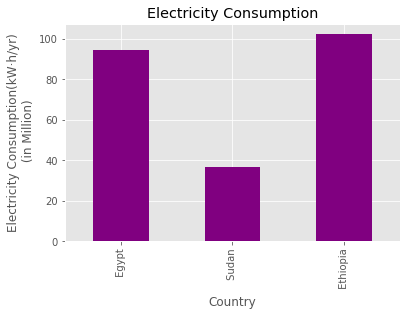

In [88]:
df4['Population (in Million)'].plot(kind='bar', color = 'purple')

plt.title('Electricity Consumption')
plt.ylabel('Electricity Consumption(kW·h/yr)\n (in Million)')
plt.xlabel('Country')

plt.show()

In [89]:
df4['Avg. Electrical energy per capita']

Country
 Egypt       1510
 Sudan        269
 Ethiopia      65
Name: Avg. Electrical energy per capita, dtype: int64

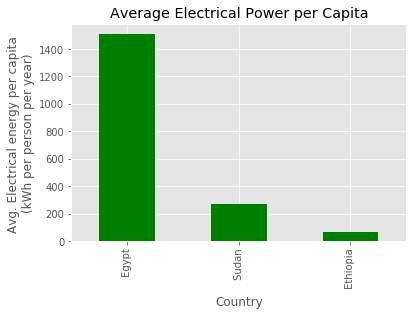

In [90]:
df4['Avg. Electrical energy per capita'].plot(kind='bar',color ='green')

plt.title('Average Electrical Power per Capita')
plt.ylabel('Avg. Electrical energy per capita \n(kWh per person per year)')
plt.xlabel('Country')

plt.show()

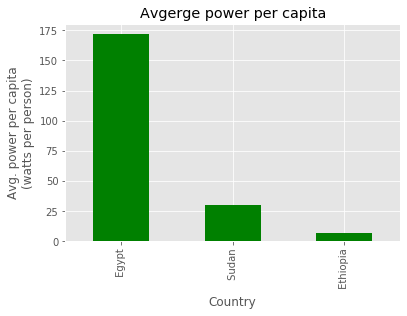

In [91]:
df4['Avg. power per capita'].plot(kind='bar', color='green')

plt.title('Avgerge power per capita')
plt.ylabel('Avg. power per capita\n(watts per person)')
plt.xlabel('Country')

plt.show()

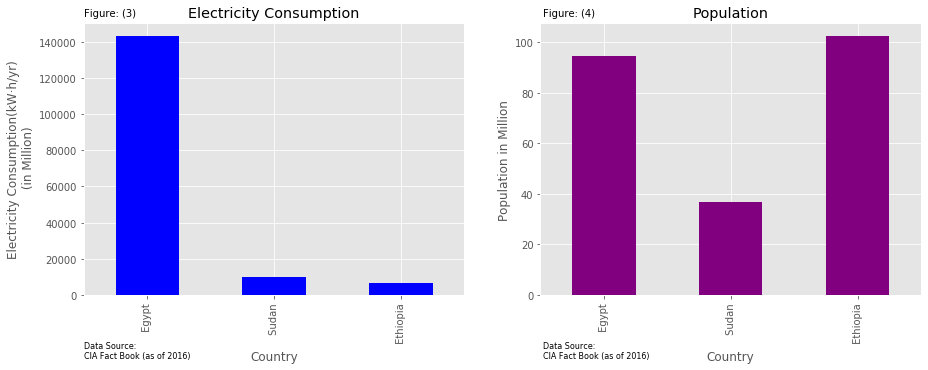

In [92]:
fig2 = plt.figure() # create figure

ax0 = fig2.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig2.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df4['Electricity Consumption(kW·h/yr) (in Million)'].plot(kind='bar', color='blue', figsize=(15, 5), ax=ax0) # add to subplot 1
ax0.set_title('Electricity Consumption')
ax0.set_ylabel('Electricity Consumption(kW·h/yr)\n (in Million)')
ax0.set_xlabel('Country')
ax0.text(0.125, .90, "Figure: (3)", transform=fig2.transFigure)
ax0.text(0.125, -.05, "Data Source: \nCIA Fact Book (as of 2016)", transform=fig2.transFigure, fontsize = 8)

# Subplot 2: Line plot
df4['Population (in Million)'].plot(kind='bar', figsize=(15, 5),color='purple', ax=ax1) # add to subplot 2
ax1.set_title ('Population')
ax1.set_ylabel('Population in Million')
ax1.set_xlabel('Country')
ax1.text(.55, .90, "Figure: (4)", transform=fig2.transFigure)
ax1.text(0.55, -.05, "Data Source: \nCIA Fact Book (as of 2016)", transform=fig2.transFigure, fontsize = 8)

fig2.savefig('ElectricConsumptionandPopulation.tif', bbox_inches='tight')# solution for avoiding the bottom cut on image save
plt.show()



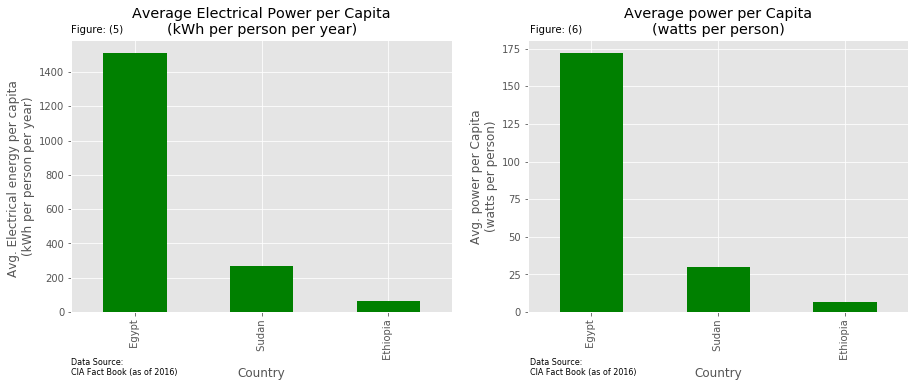

In [93]:
fig3 = plt.figure() # create figure

ax0 = fig3.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig3.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df4['Avg. Electrical energy per capita'].plot(kind='bar', color='green', figsize=(15, 5), ax=ax0) # add to subplot 1
ax0.set_title('Average Electrical Power per Capita\n(kWh per person per year)')
ax0.set_ylabel('Avg. Electrical energy per capita \n(kWh per person per year)')
ax0.set_xlabel('Country')
ax0.text(0.125, .90, "Figure: (5)", transform=fig3.transFigure)
ax0.text(0.125, -.05, "Data Source: \nCIA Fact Book (as of 2016)", transform=fig3.transFigure, fontsize = 8)


# Subplot 2: bar plot
df4['Avg. power per capita'].plot(kind='bar', figsize=(15, 5),color='green', ax=ax1) # add to subplot 2
ax1.set_title ('Average power per Capita\n(watts per person)')
ax1.set_ylabel('Avg. power per Capita\n(watts per person)')
ax1.set_xlabel('Country')
ax1.text(.55, .90, "Figure: (6)", transform=fig3.transFigure)
ax1.text(0.55, -.05, "Data Source: \nCIA Fact Book (as of 2016)", transform=fig3.transFigure, fontsize = 8)

fig3.savefig('PerCapitaElectric.tif',bbox_inches='tight') # solution for avoiding the bottom cut on image save
plt.show()



## Electricity Per Capita - Historical Data

In [94]:
# Import data
df5 = pd.read_excel('C:/Users/Belachew/Desktop/Population/Worldpopulation/ElectrcConsumptionPerCapita.xls',
                       sheet_name='Data',
                       skiprows=range(3),
                       skipfooter=2)
                     # sheet_name or  sheetname

In [98]:
#df5

In [95]:
# Drop fields not needed
df5.drop(['Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)

In [96]:
df5

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.454411,207.013343,219.253430,280.214547,312.228825,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2957.943078,3023.191203,3050.214896,3110.501656,3132.506343,NaN,NaN,NaN,NaN,NaN
258,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2649.689133,2946.957007,2862.840682,2907.735322,2804.369305,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,254.849361,193.803757,193.804009,250.963242,219.799922,NaN,NaN,NaN,NaN,NaN


In [97]:
# Set Index
df5.set_index('Country Name', inplace=True)

In [99]:
df5

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.454411,207.013343,219.253430,280.214547,312.228825,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2957.943078,3023.191203,3050.214896,3110.501656,3132.506343,NaN,NaN,NaN,NaN,NaN
Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2649.689133,2946.957007,2862.840682,2907.735322,2804.369305,NaN,NaN,NaN,NaN,NaN


In [115]:
# Save years and states to list years2 = list(map(str, range(2000, 2018)))
years3 = list(map(str, range(1970, 2015)))
states2 = list(['Ethiopia', 'Egypt', 'Sudan']) # Egypt originly was named as Egypt, Arab Rep. in the data

In [116]:
# Extract and transpose yeras and states
df6 = df5.loc[states2, years3].T

In [117]:
df6

Country Name,Ethiopia,Egypt,Sudan
1970,NaN,NaN,NaN
1971,18.872670,204.350317,26.079658
1972,18.712175,200.539246,27.405174
1973,17.753198,197.362605,32.300456
1974,17.011205,217.751358,37.235530
1975,16.489158,240.212869,38.411327
1976,16.028665,273.928264,39.036134
1977,15.039949,308.408796,39.970899
1978,15.738395,322.441252,41.628542
1979,17.281474,347.146686,40.847949


In [118]:
#Rest index
df2.reset_index() # this reset th index

Country Name,index,Ethiopia,Egypt,Sudan
0,2000,12.700000,97.700000,23.000000
1,2001,25.594385,97.439880,31.857803
2,2002,26.484259,97.727356,32.340141
3,2003,27.354923,98.800000,32.803276
4,2004,28.201456,98.239769,33.242275
5,2005,14.000000,99.400000,33.655293
6,2006,29.827066,99.040000,34.052818
7,2007,30.636023,98.861328,34.448421
8,2008,31.444979,99.800000,34.855667
9,2009,32.284969,99.311317,29.000000


In [160]:
df7 = pd.read_excel('C:/Users/Belachew/Desktop/Population/Worldpopulation/ElectrcConsumption_2016Estimate.xlsx',
                       sheet_name='Sheet2',
                       skiprows=range(0),
                       skipfooter=0)
                     # sheet_name or  sheetname

In [161]:
df7

,COUNTRY,Production,Consumption
0,Egypt,183.50,159.700
1,Ethiopia,11.15,9.062
2,Sudan,13.99,12.120


In [164]:
# Set Index
df7.set_index('COUNTRY', inplace=True)

In [ ]:
# Subplot 2: Line plot
df4['Population (in Million)'].plot(kind='bar', figsize=(15, 5),color='purple', ax=ax1) # add to subplot 2
ax1.set_title ('Population')
ax1.set_ylabel('Population in Million')
ax1.set_xlabel('Country')
ax1.text(.55, .90, "Figure: (4)", transform=fig2.transFigure)
ax1.text(0.55, -.05, "Data Source: \nCIA Fact Book (as of 2016)", transform=fig2.transFigure, fontsize = 8)

fig2.savefig('ElectricConsumptionandPopulation.tif', bbox_inches='tight')# solution for avoiding the bottom cut on image save
plt.show()


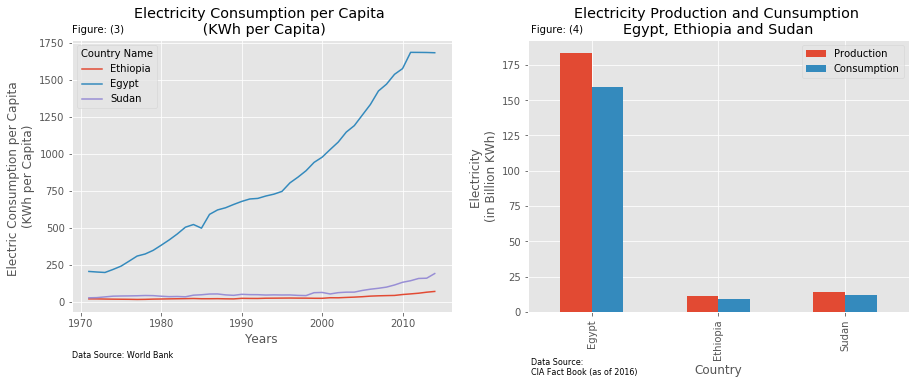

In [171]:
fig4 = plt.figure() # create figure

ax0 = fig4.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig4.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df6.plot(kind='line', figsize=(15, 5), ax=ax0) # add to subplot 1
ax0.set_title('Electricity Consumption per Capita \n (KWh per Capita)')
ax0.set_ylabel('Electric Consumption per Capita \n(KWh per Capita)')
ax0.set_xlabel('Years')
ax0.text(0.125, .90, "Figure: (3)", transform=fig4.transFigure)
ax0.text(0.125, -.001, "Data Source: World Bank", transform=fig4.transFigure, fontsize = 8)


# Subplot 2: Line plot
df7.plot(kind='bar', figsize=(15, 5), ax=ax1) # add to subplot 2
ax1.set_title ('Electricity Production and Cunsumption \nEgypt, Ethiopia and Sudan')
ax1.set_ylabel('Electricity \n(in Billion KWh)')
ax1.set_xlabel('Country')
ax1.text(.55, .90, "Figure: (4)", transform=fig4.transFigure)
ax1.text(0.55, -.05, "Data Source: \nCIA Fact Book (as of 2016)", transform=fig4.transFigure, fontsize = 8)

fig4.savefig('ElectricConsumptionandProduction.tif', bbox_inches='tight')# solution for avoiding the bottom cut on image save
plt.show()